In [1]:
#importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import os
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
base_skin_dir = os.path.join('..', 'input') #setting path

In [3]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}
# reference : https://www.kaggle.com/sid321axn/step-wise-approach-cnn-model-77-0344-accuracy#Step-7-:-Train-Test-Split

In [4]:
#mappings
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

#reference : https://www.kaggle.com/sid321axn/step-wise-approach-cnn-model-77-0344-accuracy#Step-7-:-Train-Test-Split

In [8]:
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
#removing some classes as they create class imbalance
#skin_df = skin_df[skin_df.dx != 'nv'] #too many 
#skin_df = skin_df[skin_df.dx != 'vasc']
#skin_df = skin_df[skin_df.dx != 'bcc']
#skin_df = skin_df[skin_df.dx != 'akiec']
#skin_df = skin_df[skin_df.dx != 'df'] # too less

#skin_df = skin_df.sample(n=1000)
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [9]:
skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)# for easy readibility
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes
skin_df.sample(frac=1)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
4987,HAM_0006838,ISIC_0028506,nv,follow_up,60.0,male,trunk,../input/ham10000_images_part_1/ISIC_0028506.jpg,Melanocytic nevi,4
3693,HAM_0005166,ISIC_0024815,nv,follow_up,25.0,female,abdomen,../input/ham10000_images_part_1/ISIC_0024815.jpg,Melanocytic nevi,4
3793,HAM_0002160,ISIC_0028712,nv,follow_up,65.0,female,trunk,../input/ham10000_images_part_1/ISIC_0028712.jpg,Melanocytic nevi,4
5878,HAM_0004112,ISIC_0030363,nv,follow_up,40.0,female,lower extremity,../input/ham10000_images_part_2/ISIC_0030363.jpg,Melanocytic nevi,4
7549,HAM_0001133,ISIC_0032980,nv,histo,20.0,female,back,../input/ham10000_images_part_2/ISIC_0032980.jpg,Melanocytic nevi,4
5834,HAM_0000029,ISIC_0026815,nv,follow_up,45.0,male,trunk,../input/ham10000_images_part_1/ISIC_0026815.jpg,Melanocytic nevi,4
7330,HAM_0002501,ISIC_0033388,nv,histo,40.0,male,trunk,../input/ham10000_images_part_2/ISIC_0033388.jpg,Melanocytic nevi,4
9513,HAM_0002074,ISIC_0032575,nv,consensus,40.0,female,face,../input/ham10000_images_part_2/ISIC_0032575.jpg,Melanocytic nevi,4
5515,HAM_0002383,ISIC_0032488,nv,follow_up,55.0,male,trunk,../input/ham10000_images_part_2/ISIC_0032488.jpg,Melanocytic nevi,4
4550,HAM_0002873,ISIC_0026412,nv,follow_up,45.0,male,lower extremity,../input/ham10000_images_part_1/ISIC_0026412.jpg,Melanocytic nevi,4


In [10]:
from PIL import * # for Image function 
skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((150,150)))) 
#reference : https://www.kaggle.com/sid321axn/step-wise-approach-cnn-model-77-0344-accuracy#Step-7-:-Train-Test-Split

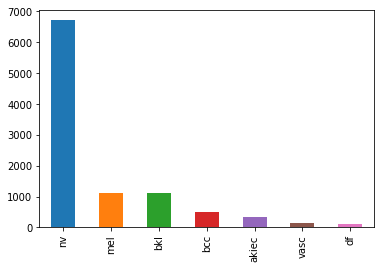

In [11]:
skin_df['dx'].value_counts().plot(kind='bar') # simple plot 

In [12]:
#from sklearn.utils import resample
#majority_nv = skin_df[skin_df.dx=='nv']
#majority_nv_downsampled = resample(majority_nv,replace=False,n_samples=1500,random_state=1)
#skin_df = skin_df[skin_df.dx!='nv']
#skin_df = pd.concat([skin_df, majority_nv_downsampled])


#skin_df['dx'].value_counts().plot(kind='bar') # simple plot 


In [13]:

skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[189, 153, 191], [192, 155, 198], [193, 156,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[26, 15, 23], [26, 15, 23], [26, 14, 24], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0026769.jpg,Benign keratosis-like lesions,2,"[[[186, 124, 135], [191, 135, 144], [195, 137,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0025661.jpg,Benign keratosis-like lesions,2,"[[[23, 11, 15], [23, 10, 19], [29, 13, 23], [3..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/ham10000_images_part_2/ISIC_0031633.jpg,Benign keratosis-like lesions,2,"[[[129, 87, 109], [140, 92, 116], [147, 103, 1..."


In [14]:
x_train,x_test,y_train,y_test = train_test_split(skin_df['image'],skin_df['cell_type_idx'],test_size = 0.2)

In [15]:
x_train = np.asarray(x_train.tolist())
x_test = np.asarray(x_test.tolist())

#x_train_mean = np.mean(x_train)
#x_train_std = np.std(x_train)

#x_test_mean = np.mean(x_test)
#x_test_std = np.std(x_test)

#x_train = (x_train - x_train_mean)/x_train_std
#x_test = (x_test - x_test_mean)/x_test_std

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1)

In [18]:
x_train = x_train.reshape(x_train.shape[0],150, 150, 3)
x_test = x_test.reshape(x_test.shape[0],150, 150, 3)
x_validate = x_validate.reshape(x_validate.shape[0],150, 150, 3)

In [19]:
x_test.shape
from google.cloud import bigquery
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


In [37]:
from keras.models import Sequential
from keras.applications import VGG16,VGG19
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
input_shape = (150, 150, 3)
num_classes = 7
conv_base=VGG16(weights='imagenet',include_top=False,input_shape = input_shape)
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [38]:
conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 1799      
Total params: 16,813,895
Trainable params: 2,099,207
Non-trainable params: 14,714,688
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['acc'])


In [40]:
history=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_validate,y_validate),shuffle=True)

Train on 7210 samples, validate on 802 samples
Epoch 1/20
7210/7210 [==============================] - 11s 2ms/step - loss: 5.0672 - acc: 0.6645 - val_loss: 4.2769 - val_acc: 0.6733
Epoch 2/20
7210/7210 [==============================] - 10s 1ms/step - loss: 4.1951 - acc: 0.6821 - val_loss: 2.7267 - val_acc: 0.7057
Epoch 3/20
7210/7210 [==============================] - 10s 1ms/step - loss: 2.6133 - acc: 0.6763 - val_loss: 1.5527 - val_acc: 0.7170
Epoch 4/20
7210/7210 [==============================] - 10s 1ms/step - loss: 1.2675 - acc: 0.6997 - val_loss: 0.9997 - val_acc: 0.7120
Epoch 5/20
7210/7210 [==============================] - 10s 1ms/step - loss: 0.9548 - acc: 0.7064 - val_loss: 0.8483 - val_acc: 0.7082
Epoch 6/20
7210/7210 [==============================] - 10s 1ms/step - loss: 0.8185 - acc: 0.7283 - val_loss: 0.8283 - val_acc: 0.7207
Epoch 7/20
7210/7210 [==============================] - 10s 1ms/step - loss: 0.7517 - acc: 0.7427 - val_loss: 0.8470 - val_acc: 0.7207
Epoch 8/

In [41]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

802/802 [==============================] - 1s 1ms/step
Validation: accuracy = 0.736908  ;  loss_v = 1.059800
Test: accuracy = 0.747379  ;  loss = 0.985368


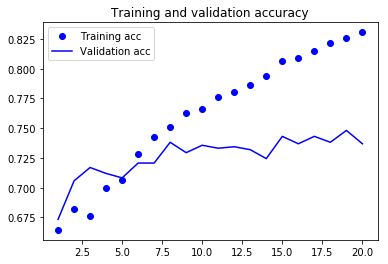

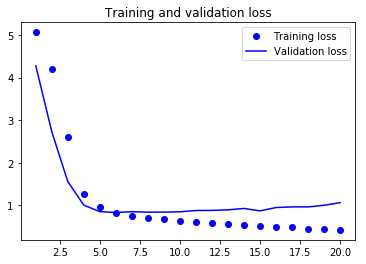

In [42]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()